In [1]:
# conding: utf-8

### Imports

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV, LassoLarsCV, LinearRegression

### Functions

In [63]:
def sign(a):
    return -1 if a < 0 else 1

def r_score(model, x, y):
    """
        model: model fitted
        x: target labels
        y: target values
    """
    r2 = model.score(x, y)
    return sign(r2) * math.sqrt(abs(r2))

### The dummy model

In [129]:
with pd.HDFStore("../data/train.h5", "r") as data:
    DATA = data.get("train")

MEANS = DATA.mean()
DATA.fillna(MEANS, inplace=True)
DATA_TRAIN, DATA_VALID = train_test_split(DATA, test_size=0.2, random_state=42)

DUMMY_FEATURES = pd.Series([u'fundamental_51', u'fundamental_53', u'fundamental_11', u'technical_30'])
ridge_model = RidgeCV(cv=8, gcv_mode='svd')
ridge_model.fit(DATA_TRAIN[DUMMY_FEATURES], DATA_TRAIN.y)

print "THE DUMMY SCORE: ", r_score(ridge_model, DATA_VALID[DUMMY_FEATURES], DATA_VALID.y)


THE DUMMY SCORE:  0.0213546205104


### Data

In [77]:
with pd.HDFStore("../data/train.h5", "r") as data:
    DATA = data.get("train")

In [78]:
DATA.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [111]:
non_tranning_features = ["id", "y", "timestamp"] 

In [112]:
print "Number of entries :\t ",len(DATA)
print "Number of features :\t ",len(DATA.columns) - 2 #- non-features: id & y

Number of entries :	  1710756
Number of features :	  109


In [113]:
DATA_TECH_30 = DATA[(pd.isnull(DATA.technical_30) == False)]
print "Number of nan values in the technical_30 column: ",DATA.technical_30.isnull().sum()
print "Number of valid values in the technical_30 column: ",len(DATA_TECH_30)

Number of nan values in the technical_30 column:  4764
Number of valid values in the technical_30 column:  1705992


In [114]:
features_30 = (DATA_TECH_30.isnull().sum().sort_values()[:11].keys())
features_30

Index([u'id', u'technical_40', u'technical_34', u'technical_30',
       u'technical_22', u'technical_21', u'technical_20', u'technical_13',
       u'technical_7', u'y', u'timestamp'],
      dtype='object')

In [115]:
DATA_TECH_30 = DATA_TECH_30[(features_30 | DUMMY_FEATURES).unique()]

In [117]:
#DATA_TECH_30 = DATA_TECH_30[(DATA_TECH_30.technical_30 != 0)] 
for f in features_30:
    print "Number of zeros in %s : %i"%(f,(DATA_TECH_30[f] == 0).astype(int).sum())

Number of zeros in id : 1638
Number of zeros in technical_40 : 0
Number of zeros in technical_34 : 566128
Number of zeros in technical_30 : 1137099
Number of zeros in technical_22 : 569167
Number of zeros in technical_21 : 0
Number of zeros in technical_20 : 1139564
Number of zeros in technical_13 : 1135321
Number of zeros in technical_7 : 22257
Number of zeros in y : 15
Number of zeros in timestamp : 749


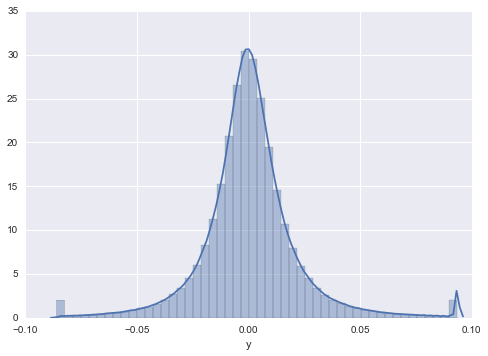

In [44]:
sbn.distplot(DATA.y)

In [ ]:
# NO outlier
DATA_TECH_30 = DATA_TECH_30[abs(DATA_TECH_30.y - np.mean(DATA_TECH_30.y)) < np.std(DATA.y) * 2.5]

In [56]:
DATA_TECH_30.head()

,id,technical_40,technical_34,technical_30,technical_22,technical_21,technical_20,technical_13,technical_7,y,timestamp
0,10,-0.414776,0.0,0.0,0.0,-0.142453,0.000000,0.001652,-0.273957,-0.011753,0
1,11,-0.273607,0.5,0.0,-0.5,-0.309356,0.000000,0.004317,-0.159432,-0.001240,0
2,12,-0.175710,-0.5,0.0,-0.5,0.122841,0.006942,0.000000,-0.227811,-0.020940,0
3,25,-0.211506,-0.5,0.0,0.0,0.812678,0.006766,0.000000,-0.106334,-0.015959,0
4,26,-0.001957,0.5,0.0,-0.5,-0.411145,0.006236,0.000000,0.000000,-0.007338,0


In [57]:
DATA_TECH_30.drop(["id", "timestamp"], axis=1).corr()

,technical_40,technical_34,technical_30,technical_22,technical_21,technical_20,technical_13,technical_7,y
technical_40,1.000000,0.123454,0.150921,0.609501,-0.001343,0.153541,-0.097789,0.669450,-0.020476
technical_34,0.123454,1.000000,0.008635,0.058385,-0.004083,-0.012769,-0.013231,0.076847,0.002147
technical_30,0.150921,0.008635,1.000000,0.202774,-0.066643,-0.236387,-0.225121,0.145220,0.001420
technical_22,0.609501,0.058385,0.202774,1.000000,0.001275,0.226626,-0.138570,0.533796,-0.017387
technical_21,-0.001343,-0.004083,-0.066643,0.001275,1.000000,0.042192,-0.001787,0.004637,0.002630
technical_20,0.153541,-0.012769,-0.236387,0.226626,0.042192,1.000000,-0.252662,0.156109,-0.022041
technical_13,-0.097789,-0.013231,-0.225121,-0.138570,-0.001787,-0.252662,1.000000,-0.073972,0.002297
technical_7,0.669450,0.076847,0.145220,0.533796,0.004637,0.156109,-0.073972,1.000000,-0.016377
y,-0.020476,0.002147,0.001420,-0.017387,0.002630,-0.022041,0.002297,-0.016377,1.000000


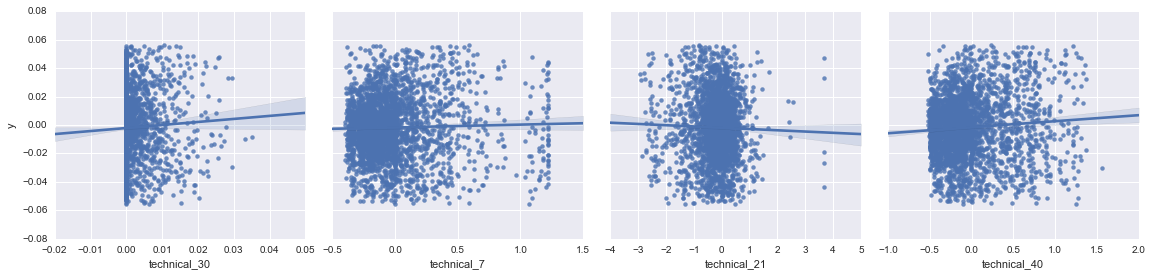

In [58]:
sbn.pairplot(
    DATA_TECH_30[3000:6000], kind="reg", size=4.0, y_vars=['y'],
    x_vars=['technical_30', 'technical_7', 'technical_21', 'technical_40']
)
# size=4.0,

In [118]:
 x_vars=['technical_30', 'technical_7', 'technical_21', 'technical_40']

In [119]:
lm = RidgeCV(cv=8)

In [120]:
lm.fit(DATA_TECH_30[x_vars], DATA_TECH_30.y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=8, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [131]:
DATA_VALID = DATA_VALID[(DATA_VALID.technical_30.isnull() == False)]

In [132]:
len(DATA_VALID)

342152

In [127]:
r_score(lm, DATA_VALID[x_vars], DATA_VALID.y)

0.01770827620290024

In [128]:
r_score(ridge_model, DATA_VALID[DUMMY_FEATURES], DATA_VALID.y)

0.021354620510393964